Experiments for this projects are done here for testing.
1. Data Ingestion
2. Preprocessing
3. Model Training

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
#loading dataset
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Data Defination:
    - RowNumber—corresponds to the record (row) number and has no effect on the output.
    - CustomerId—contains random values and has no effect on customer leaving the bank.
    - Surname—the surname of a customer has no impact on their decision to leave the bank.
    - CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
    - Geography—a customer’s location can affect their decision to leave the bank.
    - Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    - Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    - Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
    - Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
    - NumOfProducts—refers to the number of products that a customer has purchased through the bank.
    - HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
    - IsActiveMember—active customers are less likely to leave the bank.
    - EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
    - Exited—whether or not the customer left the bank.
    
- Acknowledgements:
As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

In [4]:
## Prepare/Preprocess the data
#1. Delete irrelavent columns
data=data.drop(columns=["RowNumber","CustomerId","Surname"],axis=1)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.shape

(10000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
data['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [13]:
data['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [14]:
data['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [15]:
data['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [16]:
data['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [17]:
data['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [18]:
data['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [19]:
data['EstimatedSalary'].value_counts()


EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

In [20]:
data['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

Categorical variables encoding has to be done. For Geography if we assign 0,1,2 this will consider this as ranks in label encoding which might not be appropriate. For this we will do OHE(one hot encoding), sparse = false. For Gender label encoding can be done 

In [21]:
label_encoding=LabelEncoder()

In [22]:
data['Gender']=label_encoding.fit_transform(data['Gender'])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
onehot_encoder=OneHotEncoder()

In [26]:
geo_encoded_df=onehot_encoder.fit_transform(data[['Geography']])

In [27]:
type(geo_encoded_df)

scipy.sparse._csr.csr_matrix

In [28]:
geo_encoded_df=geo_encoded_df.toarray()

In [29]:
type(geo_encoded_df)

numpy.ndarray

In [30]:
onehot_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [31]:
geo_df=pd.DataFrame(geo_encoded_df,columns=onehot_encoder.get_feature_names_out(['Geography']))

In [32]:
geo_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [33]:
#Combining encoded data to original data
data=data.drop('Geography', axis=1)

In [34]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [35]:
data=pd.concat([data,geo_df],axis=1)

In [36]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [37]:
#Save the encoders and Scalar
with open('label_encoding.pkl','wb') as file:
    pickle.dump(label_encoding,file=file)
with open('onehot_encoder.pkl','wb') as file:
    pickle.dump(onehot_encoder,file=file)  
      

Divide the dataset into independent and dependent features.


In [38]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [39]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In the SLR practical video you have clearly stated to always use fit_transform() for only train data and transform() for test data.

In [41]:
#Split the data into X_train and X_test. Y_train and Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=42)
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [42]:
with open('scalar.pkl','wb') as fp:
    pickle.dump(scalar,fp)

In [43]:
X_train.shape

(7000, 12)

In [44]:
X_test.shape

(3000, 12)

Scaling, encoding of categorical variables is done. Artificial neural network model building:
- Basic ANN will have a input layer, hidden layer(can be multiple) and output layer
- Each layer will have neurons, which are connected to each other through weights, if i have 1 input layer with 2 neurons and 1 hidden layer having 3 neurons then it will have 2*3 = 6 weights + 3 bias(As there is 3 neurons in the hidden layer). Next, if there i an addition of hidden layer with neurins as per the image then the weights will be 3*2=6 weights with 2 bias as hidden layer has 2 neurons. 
- How does a neural network in tf and keras built? 
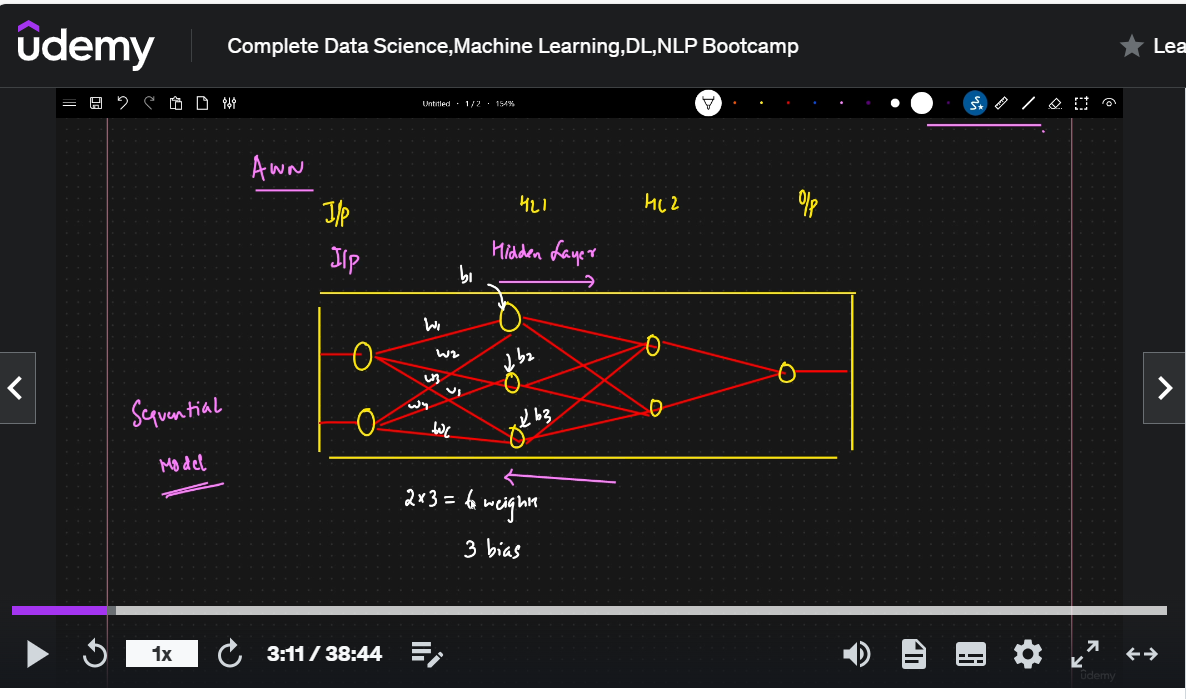


dtype('float64')